In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def euler_method(x0: float, y0: float, k: float, t0: float, f: float) -> float:
    """Calculate the Euler's numerical appriximation function value of a function f
    for the given initial position (x0, y0) and step size k.

    Args:
        x0 (float): initial x position
        y0 (float): initial y position
        k (float): step size
        t0 (float): intial time
        f (function): function to approximate

    Returns:
        float: Euler's numerical approximation of the next function value f(x1)
    """
    x = x0 + k * f(x0, y0, t0)
    return x

def heun_method(x0: float, y0: float, k: float, t0: float, f: float) -> float:
    """Calculate the Heun's numerical appriximation function value of a function f
    for the given initial position (x0, y0) and step size k.

    Args:
        x0 (float): initial x position
        y0 (float): initial y position
        k (float): step size
        t0 (float): intial time
        f (function): function to approximate

    Returns:
        float: Heun's numerical approximation of the next function value f(x1)
    """
    x1_temp = euler_method(x0, y0, k, t0, f)
    y1_temp = euler_method(x0, y0, k, t0, f)
    x = x0 + k / 2 * (f(x0, y0, t0) + f(x1_temp, y1_temp, t0 + k))
    return x

In [42]:
# verifying heuns method with an example: y' = x + y
x0 = 0
y0 = 0
xn = 60
k = 0.1

df = pd.DataFrame(columns=['x', 'y'])
df['x'] = [x0]
df['y'] = [y0]


df

,x,y
0,0,0


In [37]:
df.iloc[0, 1]
# df['x'][0]

1

In [44]:
def position(x0, v0, a, t):
    return x0 + v0 * t + 1/2 * a * t**2

def velocity(v0, a, t):
    return v0 + a * t

Earth
(0, 0) (0, 1) (1, 0)


C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\64362033.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\64362033.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\64362033.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\64362033.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipyker

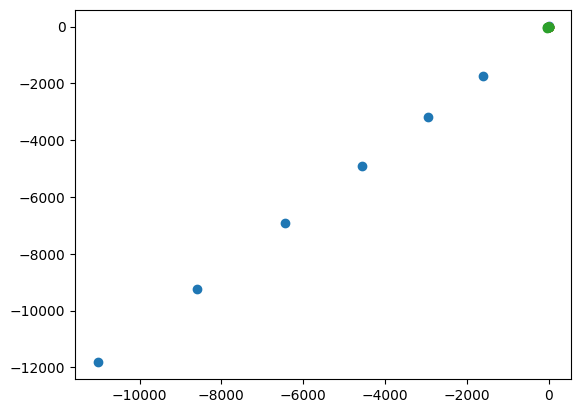

In [126]:
class Planet:
    def __init__(self, name, x, y, vx, vy, ax, ay):
        self.name = name
        self.x = x
        self.y = y  
        self.vx = vx
        self.vy = vy
        self.ax = ax
        self.ay = ay

    def getName(self):
        return f"{self.name}"

    def getPos(self):
        return (self.x, self.y)
    
    def getVel(self):
        return (self.vx, self.vy)
    
    def getAcc(self):
        return (self.ax, self.ay)
    
    def setPos(self, x, y, vx, vy, ax, ay, t):
        self.x = x + vx * t + 1/2 * ax * t**2
        self.y = y + vy * t + 1/2 * ay * t**2
    
    def setVel(self, vx, vy, ax, ay, t):
        self.vx = vx + ax * t
        self.vy = vy + ay * t

    def setAcc(self, x1, y1, x2, y2, x3, y3):
        self.ax = - (x1 - x2) / ((x1 + x2)**2 + (y1 + y2)**2)**(3/2) - (x1 - x3) / ((x1 + x3)**2 + (y1 + y3)**2)**(3/2)
        self.ay = - (y1 - y2) / ((x1 + x2)**2 + (y1 + y2)**2)**(3/2) - (y1 - y3) / ((x1 + x3)**2 + (y1 + y3)**2)**(3/2)
    
    def update(self, x1, y1, x2, y2, x3, y3, t):
        self.setAcc(x1, y1, x2, y2, x3, y3)
        self.setVel(self.vx, self.vy, self.ax, self.ay, t)
        self.setPos(self.x, self.y, self.vx, self.vy, self.ax, self.ay, t)


P1 = Planet('Earth', 0, 0, 0, 0, 0, 0)
P2 = Planet('Mars', 0, 1, 0, 0, 0, 0)
P3 = Planet('Venus', 1, 0, 0, 0, 0, 0)
print(P1.getName())
print(P1.getPos(), P2.getPos(), P3.getPos())
df = pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3'])
for i in range(10):
    P1.update(P1.getPos()[0], P1.getPos()[1], P2.getPos()[0], P2.getPos()[1], P3.getPos()[0], P3.getPos()[1], i)
    
    P2.update(P1.getPos()[0], P1.getPos()[1], P2.getPos()[0], P2.getPos()[1], P3.getPos()[0], P3.getPos()[1], i)
    
    P3.update(P1.getPos()[0], P1.getPos()[1], P2.getPos()[0], P2.getPos()[1], P3.getPos()[0], P3.getPos()[1], i)

    data = [P1.getPos()[0], P1.getPos()[1], P2.getPos()[0], P2.getPos()[1], P3.getPos()[0], P3.getPos()[1]]
    df2 = pd.DataFrame([data], columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3'])
    df = df.append(df2, ignore_index=True)

plt.scatter(df['x1'], df['y1'], label='Earth')
plt.scatter(df['x2'], df['y2'], label='Mars')
plt.scatter(df['x3'], df['y3'], label='Venus')

C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\1139313886.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\1139313886.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\1139313886.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Temp\ipykernel_46588\1139313886.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
C:\Users\qwert\AppData\Local\Tem

,time,x1,y1,vx1,vy1,ax1,ay1,x2,y2,vx2,vy2,ax2,ay2,x3,y3,vx3,vy3,ax3,ay3
0,0.00,0.000000,0.000000,-0.100000,-1.000000,1.250000,-0.000000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,2.000000,0.000000,0.100000,1.000000,-1.250000,-0.000000
1,0.01,-0.000813,-0.010000,-0.087500,-1.000000,1.250000,-0.000000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,2.000813,0.010000,0.087500,1.000000,-1.250000,-0.000000
2,0.02,-0.001814,-0.029993,-0.062544,-0.999751,1.247784,0.012468,1.0,-4.163336e-21,-8.881784e-18,-1.387779e-19,-4.440892e-16,-6.938894e-18,2.001814,0.029993,0.062544,0.999751,-1.247784,-0.012468
3,0.03,-0.002011,-0.059935,-0.025230,-0.998634,1.243805,0.037237,1.0,-8.326673e-21,-8.881784e-18,-1.387779e-19,0.000000e+00,0.000000e+00,2.002011,0.059935,0.025230,0.998634,-1.243805,-0.037237
4,0.04,-0.000048,-0.099702,0.024303,-0.995671,1.238336,0.074070,1.0,-1.137979e-19,-2.220446e-17,-1.804112e-18,-3.330669e-16,-4.163336e-17,2.000048,0.099702,-0.024303,0.995671,-1.238336,-0.074070
5,0.05,0.005785,-0.149025,0.085877,-0.989532,1.231473,0.122775,1.0,-4.642120e-19,-4.440892e-17,-5.273559e-18,-4.440892e-16,-6.938894e-17,1.994215,0.149025,-0.085877,0.989532,-1.231473,-0.122775
6,0.06,0.017543,-0.207407,0.159265,-0.978532,1.223136,0.183339,1.0,-1.530026e-18,-9.103829e-17,-1.360023e-17,-7.771561e-16,-1.387779e-16,1.982457,0.207407,-0.159265,0.978532,-1.223136,-0.183339
7,0.07,0.037607,-0.274022,0.244178,-0.960606,1.213047,0.256087,1.0,-4.114070e-18,-1.454392e-16,-2.914335e-17,-7.771561e-16,-2.220446e-16,1.962393,0.274022,-0.244178,0.960606,-1.213047,-0.256087
8,0.08,0.068668,-0.347589,0.340232,-0.933256,1.200670,0.341867,1.0,-9.642981e-18,-1.987299e-16,-5.578871e-17,-6.661338e-16,-3.330669e-16,1.931332,0.347589,-0.340232,0.933256,-1.200670,-0.341867
9,0.09,0.113687,-0.426208,0.446889,-0.893450,1.185083,0.442293,1.0,-2.073411e-17,-2.686740e-16,-1.007527e-16,-7.771561e-16,-4.996004e-16,1.886313,0.426208,-0.446889,0.893450,-1.185083,-0.442293


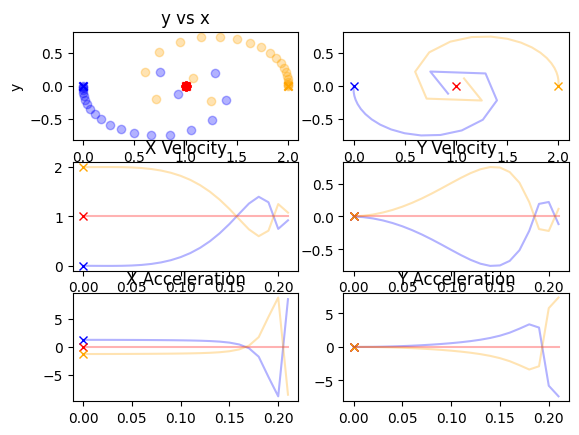

In [205]:
# Starting from scratch
def acceleration(x1, y1, x2, y2, x3, y3):
    """Returns tuple of acceleration of an object with position (x1, y1) due to the gravitational force of two other objects with positions (x2, y2) and (x3, y3).

    Args:
        x1 (_type_): current object's x position
        y1 (_type_): 
        x2 (_type_): _description_
        y2 (_type_): _description_
        x3 (_type_): _description_
        y3 (_type_): _description_

    Returns:
        _type_: _description_
    """
    return - ((x1 - x2)/((x1-x2)**2+(y1-y2)**2)**(3/2)) - ((x1 - x3)/((x1-x3)**2+(y1-y3)**2)**(3/2)), - ((y1 - y2)/((x1-x2)**2+(y1-y2)**2)**(3/2)) - ((y1 - y3)/((x1-x3)**2+(y1-y3)**2)**(3/2))

def velocity(v0x, v0y, ax, ay, t):
    return (v0x + ax * t, v0y + ay * t)

def position(x0, y0, v0x, v0y, ax, ay, t):
    return (x0 + v0x * t + 1/2 * ax * t**2, y0 + v0y * t + 1/2 * ay * t**2)

df = pd.DataFrame(columns=['time', 'x1', 'y1', 'vx1', 'vy1', 'ax1', 'ay1', 'x2', 'y2', 'vx2', 'vy2', 'ax2', 'ay2', 'x3', 'y3', 'vx3', 'vy3', 'ax3', 'ay3'])


# Initial conditions
x1 = 0
y1 = 0
vx1 = -0.1
vy1 = -1
x2 = 1
y2 = 0
vx2 = 0
vy2 = 0
x3 = 2
y3 = 0
vx3 = 0.1
vy3 = 1

for i in range(0,22):
    t = i/100
    ax1, ay1 = acceleration(x1, y1, x2, y2, x3, y3)
    ax2, ay2 = acceleration(x2, y2, x1, y1, x3, y3)
    ax3, ay3 = acceleration(x3, y3, x1, y1, x2, y2)
    vx1, vy1 = velocity(vx1, vy1, ax1, ay1, t)
    vx2, vy2 = velocity(vx2, vy2, ax2, ay2, t)
    vx3, vy3 = velocity(vx3, vy3, ax3, ay3, t)
    x1, y1 = position(x1, y1, vx1, vy1, ax1, ay1, t)
    x2, y2 = position(x2, y2, vx2, vy2, ax2, ay2, t)
    x3, y3 = position(x3, y3, vx3, vy3, ax3, ay3, t)
    data = [t, x1, y1, vx1, vy1, ax1, ay1, x2, y2, vx2, vy2, ax2, ay2, x3, y3, vx3, vy3, ax3, ay3]
    df2 = pd.DataFrame([data], columns=['time', 'x1', 'y1', 'vx1', 'vy1', 'ax1', 'ay1', 'x2', 'y2', 'vx2', 'vy2', 'ax2', 'ay2', 'x3', 'y3', 'vx3', 'vy3', 'ax3', 'ay3'])
    df = df.append(df2, ignore_index=True)

plt.figure(1)
plt.subplot(321)
plt.title("y vs x")
plt.scatter(df['x1'][0], df['y1'][0], c='blue', marker='x', label='Earth')
plt.scatter(df['x2'][0], df['y2'][0], c='red', marker='x',label='Mars')
plt.scatter(df['x3'][0], df['y3'][0], c='orange', marker='x', label='Venus')
plt.scatter(df['x1'], df['y1'], c='blue', alpha=0.3, label='Earth')
plt.scatter(df['x2'], df['y2'], c='red', alpha=0.3, label='Mars')
plt.scatter(df['x3'], df['y3'], c='orange', alpha=0.3, label='Venus')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(322)
plt.plot(df['x1'][0], df['y1'][0], c='blue', marker='x', label='Earth')
plt.plot(df['x2'][0], df['y2'][0], c='red', marker='x',label='Mars')
plt.plot(df['x3'][0], df['y3'][0], c='orange', marker='x', label='Venus')
plt.plot(df['x1'], df['y1'], c='blue', alpha=0.3, label='Earth')
plt.plot(df['x2'], df['y2'], c='red', alpha=0.3, label='Mars')
plt.plot(df['x3'], df['y3'], c='orange', alpha=0.3, label='Venus')
plt.subplot(323)
plt.title('X Velocity')
plt.plot(df['time'][0], df['x1'][0], c='blue', marker='x', label='Earth')
plt.plot(df['time'][0], df['x2'][0], c='red', marker='x',label='Mars')
plt.plot(df['time'][0], df['x3'][0], c='orange', marker='x', label='Venus')
plt.plot(df['time'], df['x1'], c='blue', alpha=0.3, label='Earth')
plt.plot(df['time'], df['x2'], c='red', alpha=0.3, label='Mars')
plt.plot(df['time'], df['x3'], c='orange', alpha=0.3, label='Venus')
plt.subplot(324)
plt.title('Y Velocity')
plt.plot(df['time'][0], df['y1'][0], c='blue', marker='x', label='Earth')
plt.plot(df['time'][0], df['y2'][0], c='red', marker='x',label='Mars')
plt.plot(df['time'][0], df['y3'][0], c='orange', marker='x', label='Venus')
plt.plot(df['time'], df['y1'], c='blue', alpha=0.3, label='Earth')
plt.plot(df['time'], df['y2'], c='red', alpha=0.3, label='Mars')
plt.plot(df['time'], df['y3'], c='orange', alpha=0.3, label='Venus')
plt.subplot(325)
plt.title('X Acceleration')
plt.plot(df['time'][0], df['ax1'][0], c='blue', marker='x', label='Earth')
plt.plot(df['time'][0], df['ax2'][0], c='red', marker='x',label='Mars')
plt.plot(df['time'][0], df['ax3'][0], c='orange', marker='x', label='Venus')
plt.plot(df['time'], df['ax1'], c='blue', alpha=0.3, label='Earth')
plt.plot(df['time'], df['ax2'], c='red', alpha=0.3, label='Mars')
plt.plot(df['time'], df['ax3'], c='orange', alpha=0.3, label='Venus')
plt.subplot(326)
plt.title('Y Acceleration')
plt.plot(df['time'][0], df['ay1'][0], c='blue', marker='x', label='Earth')
plt.plot(df['time'][0], df['ay2'][0], c='red', marker='x',label='Mars')
plt.plot(df['time'][0], df['ay3'][0], c='orange', marker='x', label='Venus')
plt.plot(df['time'], df['ay1'], c='blue', alpha=0.3, label='Earth')
plt.plot(df['time'], df['ay2'], c='red', alpha=0.3, label='Mars')
plt.plot(df['time'], df['ay3'], c='orange', alpha=0.3, label='Venus')
df

